In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

systems = ['jabref','prom','team']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laoa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)
files = []
dfs = [] # Order: [jabref, prom , team]
df_total = None
for system in systems:
    files.append(config['file locations'][system]['preprocess comparisons'])
    dfs.append(pd.read_csv("../" + config['file locations'][system]['preprocess comparisons']))
    
jabref_bow = dfs[0].loc[dfs[0]['Feature rep.'].isin(['Bag-of-words'])]
jabref_tfidf = dfs[0].loc[dfs[0]['Feature rep.'].isin(['TF-IDF'])]

prom_bow = dfs[1].loc[dfs[1]['Feature rep.'].isin(['Bag-of-words'])]
prom_tfidf = dfs[1].loc[dfs[1]['Feature rep.'].isin(['TF-IDF'])]

team_bow = dfs[2].loc[dfs[2]['Feature rep.'].isin(['Bag-of-words'])]
team_tfidf = dfs[2].loc[dfs[2]['Feature rep.'].isin(['TF-IDF'])]


In [13]:
df_temp = [dfs[0], dfs[1], dfs[2]]
df_all = pd.concat(df_temp)
df_all.sort_values(by='macro_f1',ascending=[False]).head(20)

,classifier,setting_id,Feature rep.,settings,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1,train_size,test_size,report_table
1,SVM,s0,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.921543,0.673258,0.710544,0.925997,0.921543,0.688188,0.921756,83,752,GUI LOGIC MODEL ...
25,SVM,s4,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.917553,0.676895,0.672575,0.924301,0.917553,0.674689,0.920851,83,752,GUI LOGIC MODEL ...
0,MaxEnt,s0,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.906915,0.688235,0.742692,0.926094,0.906915,0.707696,0.913465,83,752,GUI LOGIC MODEL ...
24,MaxEnt,s4,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.906915,0.896190,0.795971,0.923808,0.906915,0.805868,0.908873,83,752,GUI LOGIC MODEL ...
0,MaxEnt,s0,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.896033,0.746684,0.738464,0.899264,0.896033,0.741016,0.896814,81,731,Client Common Logic ...
1,SVM,s0,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.890561,0.753022,0.714289,0.902450,0.890561,0.724599,0.893344,81,731,Client Common Logic ...
24,MaxEnt,s4,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.891929,0.740519,0.733821,0.894341,0.891929,0.735999,0.892648,81,731,Client Common Logic ...
27,MaxEnt,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.879617,0.762061,0.811590,0.903012,0.879617,0.771807,0.886041,81,731,Client Common Logic ...
3,MaxEnt,s0,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.877660,0.651706,0.700652,0.902493,0.877660,0.664794,0.883439,83,752,GUI LOGIC MODEL ...
25,SVM,s4,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.886457,0.735084,0.702348,0.889626,0.886457,0.706089,0.883425,81,731,Client Common Logic ...


Text(0.5, 0.98, 'Subject system: Jabref')

<Figure size 360x360 with 0 Axes>

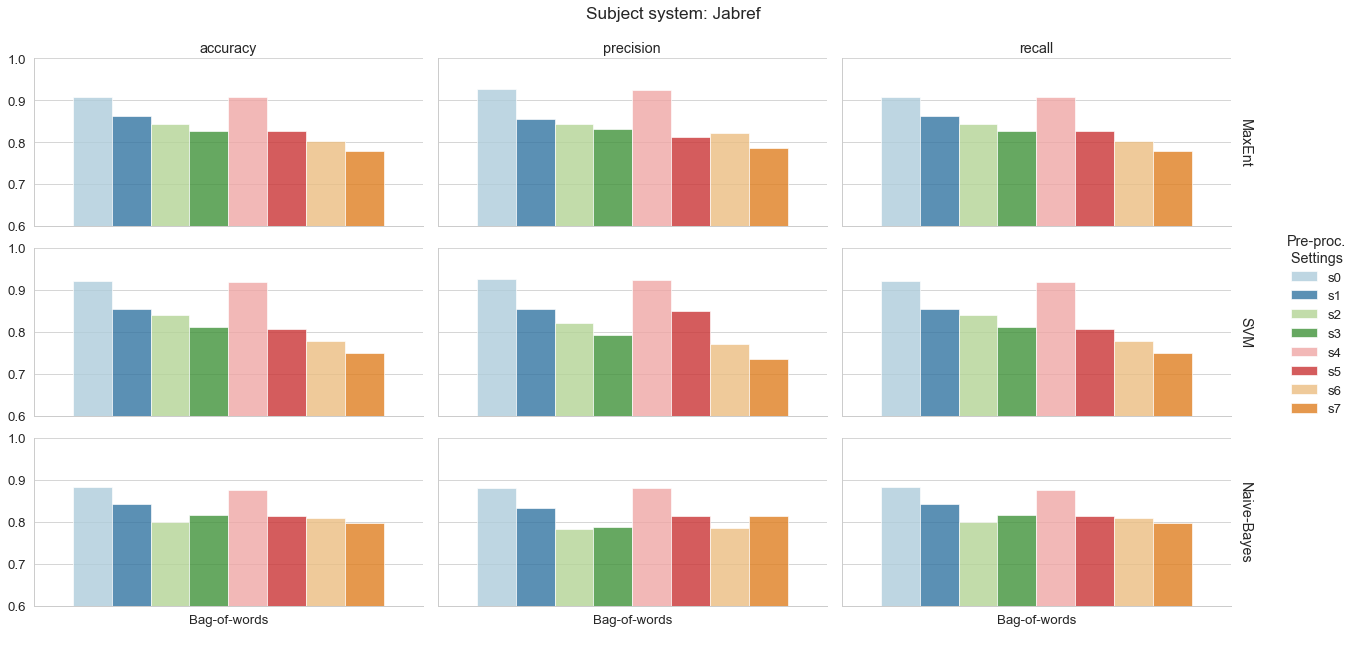

In [3]:
jabref_bow = jabref_bow.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'


df_vis1 = pd.concat([j_acc,j_prc, j_recall], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="Paired",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

Text(0.5, 0.98, 'Subject system: Prom')

<Figure size 360x360 with 0 Axes>

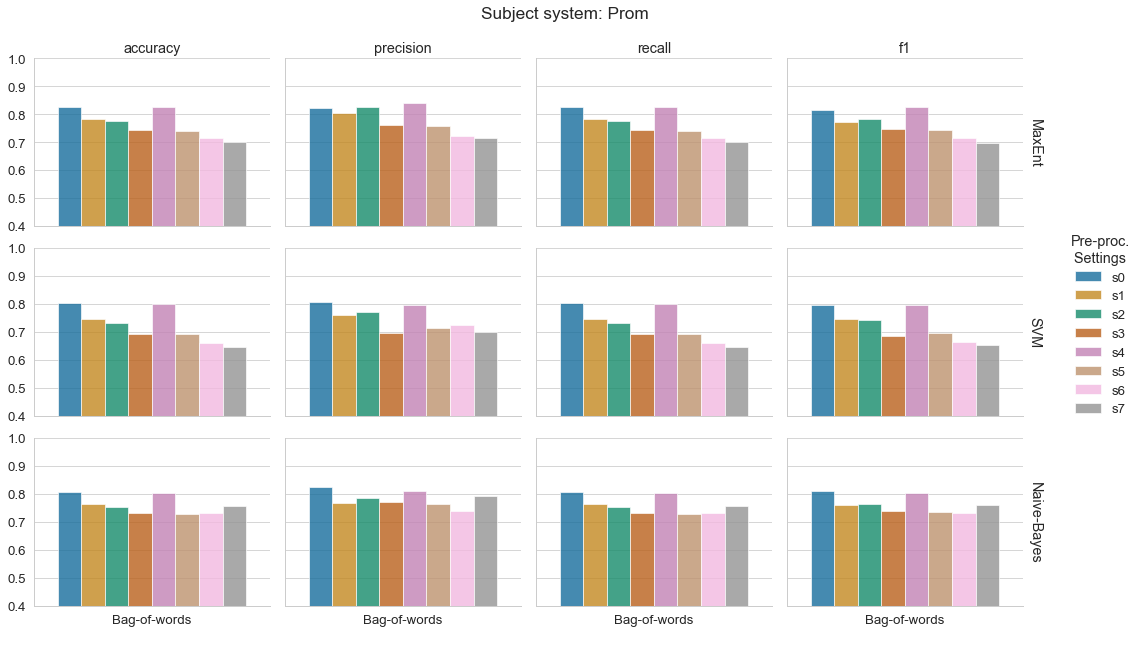

In [4]:
prom_bow = prom_bow.drop(labels={'settings'}, axis=1)
prom_bow = prom_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'


df_vis = pd.concat([p_acc,p_prc, p_recall, p_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

Text(0.5, 0.98, 'Subject system: teammates')

<Figure size 360x360 with 0 Axes>

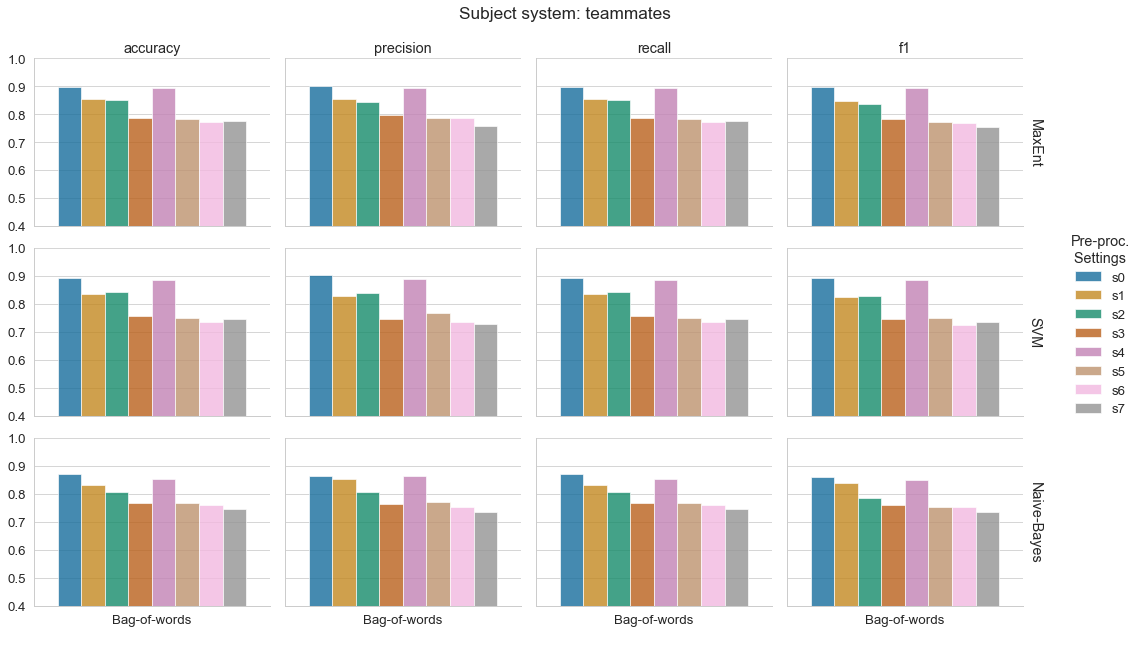

In [5]:
team_bow = team_bow.drop(labels={'settings'}, axis=1)
team_bow = team_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'


df_vis = pd.concat([t_acc,t_prc, t_recall, t_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')

# TF-IDF

Text(0.5, 0.98, 'Subject system: Jabref')

<Figure size 360x360 with 0 Axes>

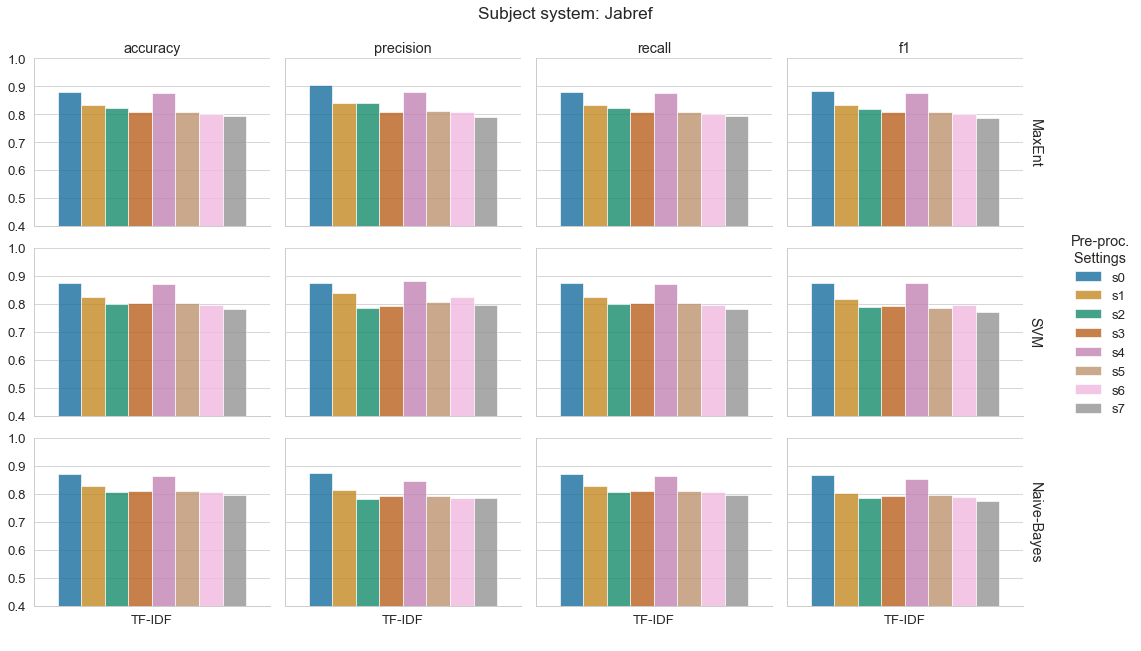

In [6]:
jabref_bow = jabref_tfidf.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'


df_vis1 = pd.concat([j_acc,j_prc, j_recall, j_f1], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

Text(0.5, 0.98, 'Subject system: Prom')

<Figure size 360x360 with 0 Axes>

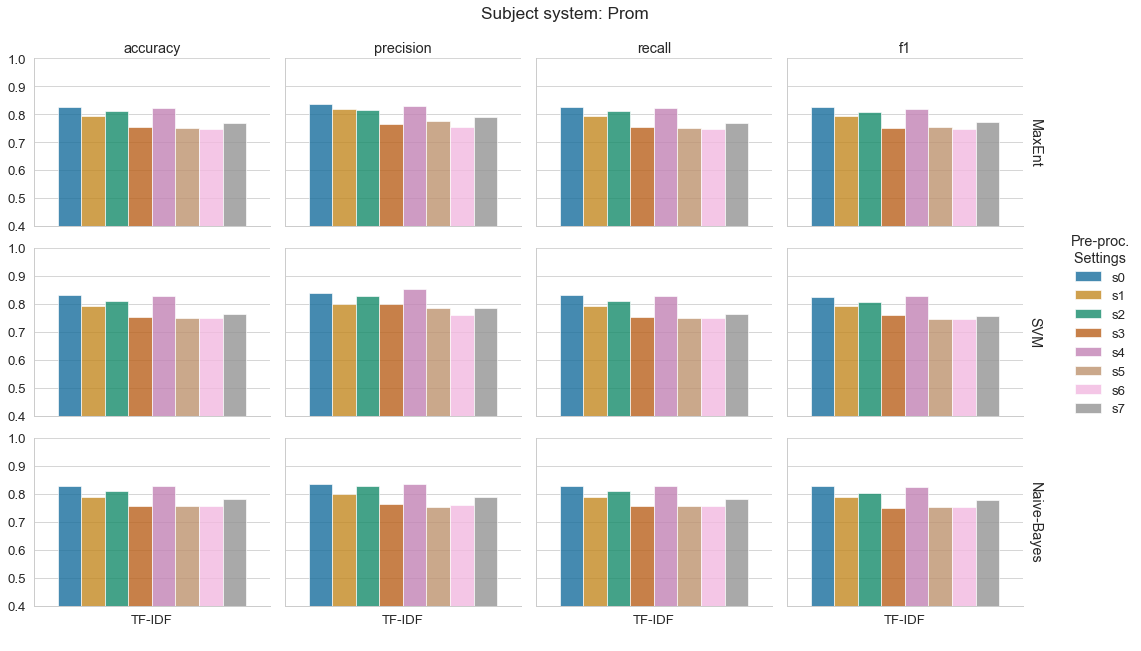

In [7]:
prom_bow = prom_tfidf.drop(labels={'settings'}, axis=1)
prom_bow = prom_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'


df_vis = pd.concat([p_acc,p_prc, p_recall, p_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

Text(0.5, 0.98, 'Subject system: teammates')

<Figure size 360x360 with 0 Axes>

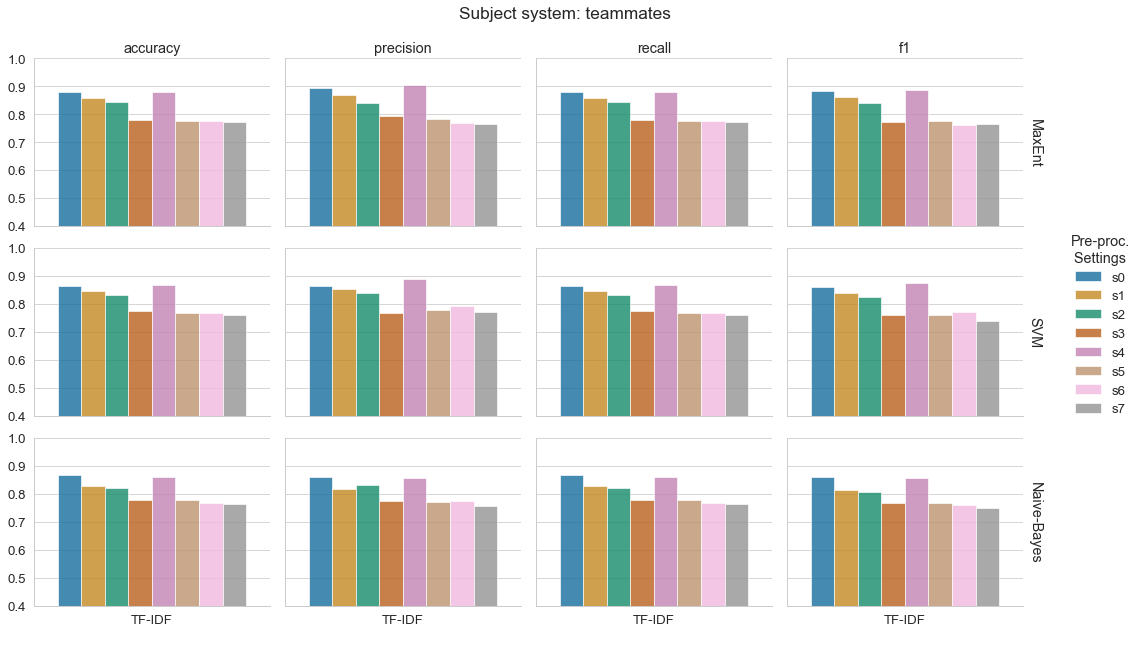

In [8]:
team_bow = team_tfidf.drop(labels={'settings'}, axis=1)
team_bow = team_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'


df_vis = pd.concat([t_acc,t_prc, t_recall, t_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')